# Gaussian Modelling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

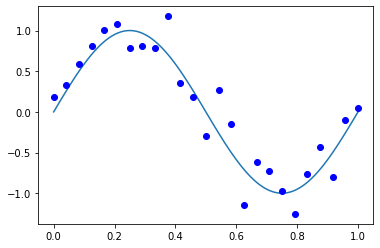

In [ ]:
x_sin = np.linspace(0,1,100)
t_sin = np.sin(2*np.pi*x_sin)
plt.plot(x_sin,t_sin)

N = 25
eps = 0.3 * np.random.randn(N)
x = np.linspace(0,1,N)
t = np.sin(2*np.pi*x)+ eps
plt.plot(x,t,'bo')
plt.show()

# 1. Create nested data sets

In [ ]:
ds = [[x[i],t[i]] for i in range(len(x))] # The nested dataset

# select specific sets from the nest as follows:

idx_1 = 10
idx_2 = [10,14]
idx_4 = [0,10,14,24]
idx_25 = [i for i in range(len(ds))]

ds_1 = [ds[idx_1]]
ds_2 = [ds[i] for i in idx_2]
ds_4 = [ds[i] for i in idx_4]
ds_25 = ds

# x = np.array(ds).T[0]
# y = np.array(ds).T[1]

In [ ]:
def data_plot(idx):
  x_sin = np.linspace(0,1,100)
  t_sin = np.sin(2*np.pi*x_sin)
  plt.plot(x_sin,t_sin)

  ds_val = [ds[i] for i in idx]
  plt.plot(np.array(ds_val).T[0],np.array(ds_val).T[1],'bo')
  plt.show()

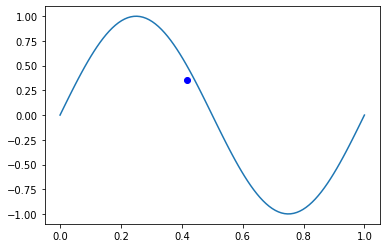

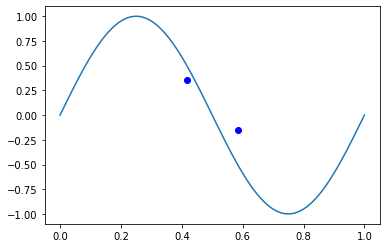

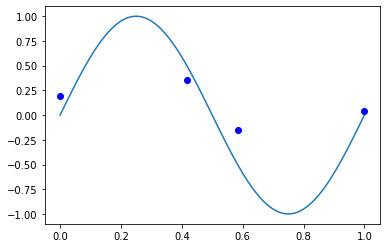

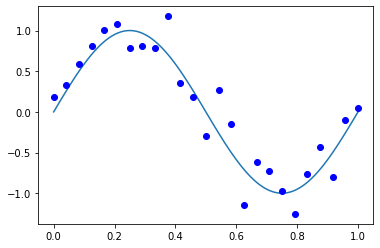

In [ ]:
x_sin = np.linspace(0,1,100)
t_sin = np.sin(2*np.pi*x_sin)
plt.plot(x_sin,t_sin)
plt.plot(np.array(ds_1).T[0],np.array(ds_1).T[1],'bo')
plt.show()

for i in [idx_2,idx_4,idx_25]:
  data_plot(i)

In [ ]:
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
alpha = 10**(-3)
beta_inv = 0.09
beta = 1/beta_inv

def model_gauss(data):
  poly = PolynomialFeatures(degree=9)
  phi = poly.fit_transform(np.array(data).T[0].reshape(-1,1))
  Sn_inv = alpha * np.identity(len(phi[0])) + beta * phi.T @ phi
  Sn = np.linalg.inv(Sn_inv)
  t_out = np.array(data).T[1]
  mn = beta * Sn @ phi.T @ t_out

  mean_phi = (mn @ phi.T)
  var_phi = np.diag(1/beta + phi @ Sn @ phi.T)
  return mn, Sn

In [ ]:
mn_1, sn_1 = model_gauss(ds_1)
mn_2, sn_2 = model_gauss(ds_2)
mn_4, sn_4 = model_gauss(ds_4)
mn_25, sn_25 = model_gauss(ds_25)

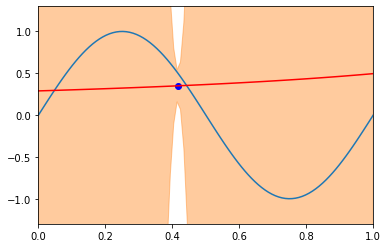

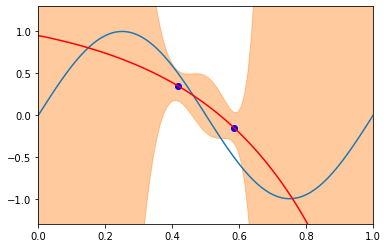

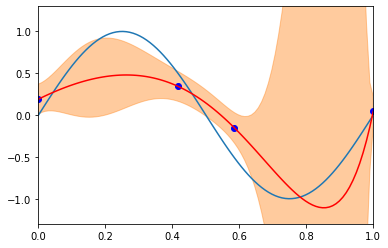

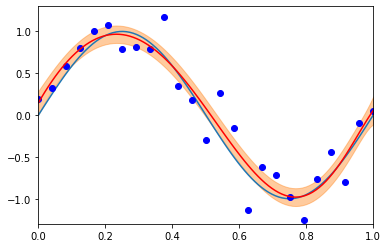

In [ ]:
poly = PolynomialFeatures(degree=9)
phi_100 = poly.fit_transform(np.linspace(0,1,100).reshape(-1,1))

x_sin = np.linspace(0,1,100)
t_sin = np.sin(2*np.pi*x_sin)

def plot_all(mn,sn,data):
  mean_phi = (phi_100 @ mn)
  var_phi = np.diag(1/beta + phi_100 @ sn @ phi_100.T)

  plt.plot(x_sin,t_sin)
  plt.plot(np.array(data).T[0],np.array(data).T[1],'bo')

  plt.plot(np.linspace(0,1,len(mean_phi)), mean_phi, 'r')

  plt.fill_between(np.linspace(0,1,len(mean_phi)), mean_phi-var_phi ,
                  mean_phi+var_phi, color = 'C1',alpha = 0.4)
  plt.ylim([-1.3,1.3])
  plt.xlim([0,1])
  plt.show()

plot_all(mn_1,sn_1,ds_1)
plot_all(mn_2,sn_2,ds_2)
plot_all(mn_4,sn_4,ds_4)
plot_all(mn_25,sn_25,ds_25)

# 3. Plotting y(x,w) using posterior distribution p(w|Dn)

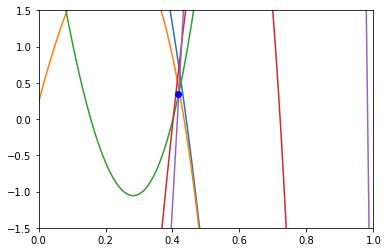

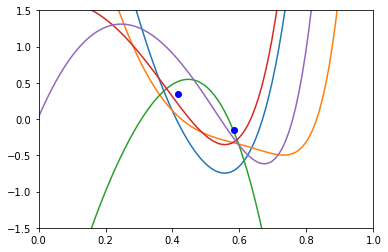

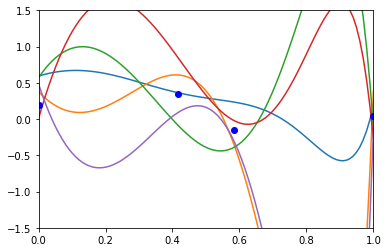

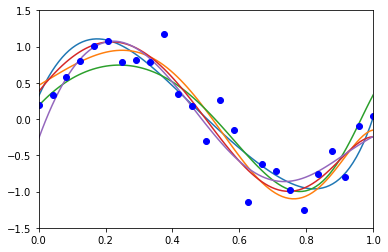

In [ ]:
def y_from_post(mn,sn,data):
  w = np.random.multivariate_normal(mn,sn,5)

  for i in range(5):
    plt.plot(np.linspace(0,1,len((phi_100 @ w.T)[:,i])),(phi_100 @ w.T)[:,i])

  plt.plot(np.array(data).T[0],np.array(data).T[1],'bo')
  plt.xlim([0,1])
  plt.ylim([-1.5,1.5])
  plt.show()

y_from_post(mn_1,sn_1,ds_1)
y_from_post(mn_2,sn_2,ds_2)
y_from_post(mn_4,sn_4,ds_4)
y_from_post(mn_25,sn_25,ds_25)

# Question 4 

Our results show a good addherneace to the data, at least once there is a reasonably large data set to work from. The results are related to regression problems from earlier weeks but with the Bayesian approach, there is significantly less overfitting. 

In general, the results are similar to Bishop’s. The red shaped region corresponds to a standard deviation around the mean of our predictive Guassian distribution. Like bishop’s, the standard deviation is smallest around the actual data points. Our model deviated most noticeably in the $N=4$ case, here the mean of the predictive distribution is less symmetric and  has a smaller standard deviation than the one presented in Bishop. The $N=2$ case is also more curved than the one presented in Bishop. 

The major difference between our model and the one presented in the text is the choice of basis functions. In figure 3.8 of Bishop $\mathbf{m}_N(\Phi)$ (red) is antisymmetric to the center of the dataset distribution, while our plots of $\mathbf{m}_N(\Phi)$ does not show the same symmetric behaviour. This is due to the fact that Bishop uses Guassian functions as basis functions which are symmetric around its mean whereas our basis functions are polynomials which do not have to be symmetric. Another thing that can be explained by the choice of basis functions is that in bishop the mean $\mathbf{m}_N(\Phi)$ "flattens out" on the edges. In other words, as $x → \pm ∞$, $\mathbf{m}_N(\Phi) → 0$ which one would expect from gaussian functions. For our polynomial basis functions this is not the case, they approach infinity for $x → \pm ∞$.

Another instance of the basis functions affecting the results is apparent  in question 3 where these basis functions are graphed explicitly. In the text, this plot generated from basis function that are Guassian, whereas our plots are based off of polynomial b. In the figures of assignment 3 one can see that for $N>2$, the polynomials are visibly more similar to each other compared to their Guassian counterparts in Bishop, which makes sense considering the lower standard deviation (see figure 3.8 in Bishop and figure in assignment 2).
